<a href="https://colab.research.google.com/drive/1c1-1dw21X-HjD46TxXWQPxtw98DUpAFj?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playground

Link to the original dataset Colab: https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/master/projects/load_kay_images.ipynb#scrollTo=RTYcrxVJ7mqV

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from scipy import stats
import sklearn.linear_model as skl

# Understanding the Dataset

## Import Data and Labels

In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [ ]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')

## Play around

Display $i$-th image from the dataset

['entity' 'round shape' 'sphere' 'bubble']


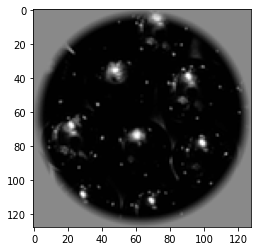

In [ ]:
i = 1
print(labels[:,i])
plt.imshow(dat['stimuli'][i,:,:], cmap='gray')

Display images of a certain label

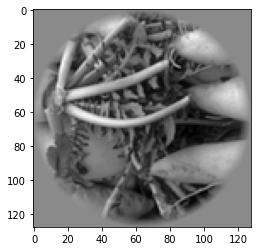

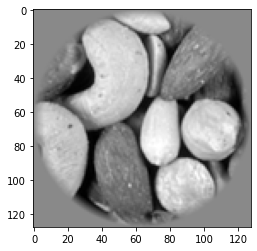

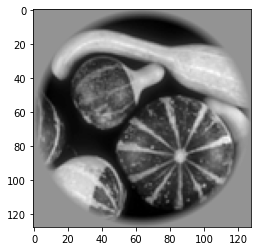

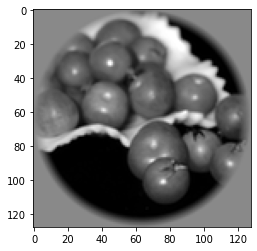

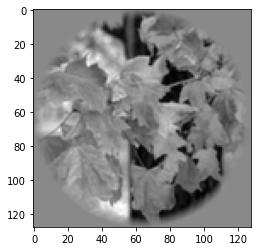

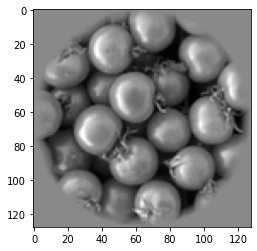

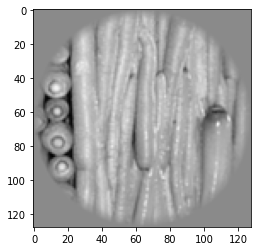

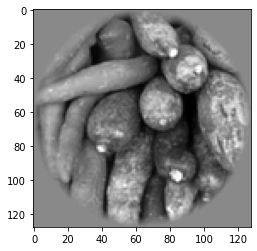

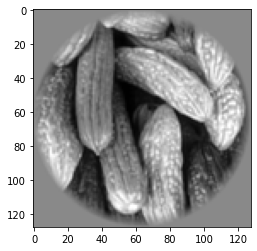

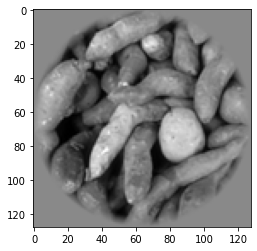

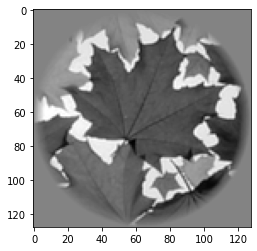

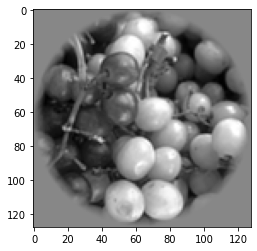

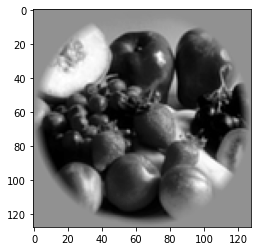

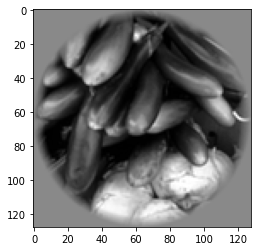

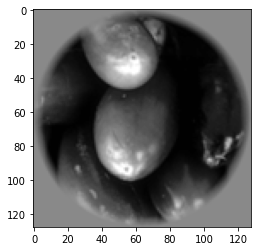

In [ ]:
label = 'cucumber'
idx = np.where(labels[3,:] == label)[0]

for i in range(len(idx)):
  plt.figure()
  plt.imshow(dat['stimuli'][idx[i],:,:], cmap='gray')

In [ ]:
# df = df.sort_values(by=0, ascending=False)
# print(df[:15])
# df[:35].plot(kind='bar')

In [ ]:
# print('Total nr. of imagenet labels: ', df.shape[0])
# print('Nr. of labels with single entries: ', df[(df == 1)[0]].shape[0])

In [ ]:
# coloring = np.ones_like(dat['stimuli'][0,:,:])
# coloring.shape

# for i in range(zeros.shape[0]):
#   for j in range(zeros.shape[1]):
#     if ( (i-64)**2 + (j-64)**2 < 62**2 ):
#       coloring[i,j] = 0

# plt.imshow(coloring, cmap='gray')

In [ ]:
# for i in range(4):
#   print('Level ', i, ':')
#   labels_i = labels[i,:]
#   label_counts = Counter(labels_i)
#   df = pd.DataFrame.from_dict(label_counts, orient='index')
#   print('\t Total nr. of imagenet labels: ', df.shape[0])
#   print('\t Nr. of labels with single entries: ', df[(df == 1)[0]].shape[0])
#   df = df.sort_values(by=0, ascending=False)
#   print(df[:8])
#   df[:8].plot(kind='bar')

# Try Modelling

## Hard-coding

In [ ]:
X = dat['responses']
X.shape

(1750, 8428)

In [ ]:
y = dat['stimuli'][:,64,64].reshape(-1,1)
y.shape

(1750, 1)

In [ ]:
beta = 10
var = 1

theta_hat = np.linalg.inv(X.T @ X + var * beta * np.eye(X.shape[1])) @ X.T @ y
theta_hat.shape

(8428, 1)

(array([1.000e+00, 9.000e+00, 9.700e+01, 7.080e+02, 2.607e+03, 3.370e+03,
        1.343e+03, 2.730e+02, 1.600e+01, 4.000e+00]),
 array([-0.01122433, -0.00907938, -0.00693443, -0.00478948, -0.00264454,
        -0.00049959,  0.00164536,  0.00379031,  0.00593526,  0.00808021,
         0.01022516]),
 <a list of 10 Patch objects>)

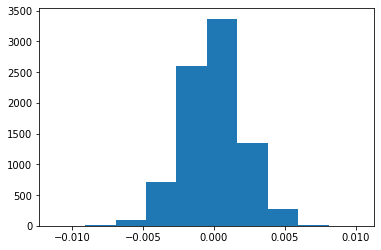

In [ ]:
plt.hist(theta_hat)

In [ ]:
y_hat = X @ theta_hat
y_hat.shape

(1750, 1)

In [ ]:
mse = np.mean((y - y_hat)**2)
print(mse)

0.010831105307566003


In [ ]:
from scipy import stats

stats.ttest_ind(y, y_hat)

Ttest_indResult(statistic=array([-12.2121701]), pvalue=array([1.28219632e-33]))

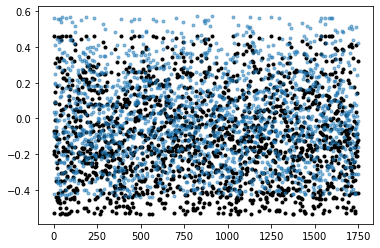

In [ ]:
plt.plot(y,'k.', alpha = 1)
plt.plot(y_hat,'.', alpha = 0.5)

## Scikit learn

In [ ]:
X = dat['responses']
X.shape

(1750, 8428)

In [ ]:
y = dat['stimuli'].reshape(X.shape[0],-1)
y.shape

(1750, 16384)

### $L_1$ Regularization: nope

In [ ]:
model = skl.Lasso(1e-10)

model.fit(X,y)
model.coef_.shape

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


KeyboardInterrupt: ignored

In [ ]:
y_hat = linreg_Lasso.predict(X)
y_hat.shape

NameError: ignored

In [ ]:
mse = np.mean((y-y_hat)**2)
print('MSE: ', mse)

MSE:  0.09703543213258349


In [ ]:
stats.ttest_ind(y, y_hat)

### $L_2$ Regularization

In [ ]:
model = skl.Ridge(alpha=10)

model.fit(X,y)

# h = plt.hist(model.coef_, bins=50)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_hat = model.predict(X)
y_hat.shape

(1750, 16384)

In [ ]:
mse = np.mean((y-y_hat)**2)
print('MSE: ', mse)

MSE:  0.00011300432159751269


In [ ]:
stats.ttest_ind(y, y_hat)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=array([nan, nan, nan, ..., nan, nan, nan]), pvalue=array([nan, nan, nan, ..., nan, nan, nan]))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fee46cfb378> (for post_execute):


KeyboardInterrupt: ignored

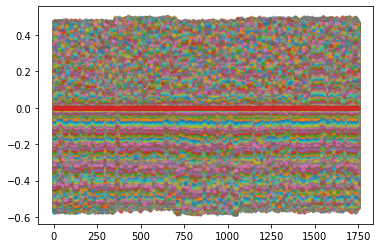

In [ ]:
plt.plot(y,'k.', alpha = 1)
plt.plot(y_hat,'.', alpha = 0.5)

### Together with cross-validation: $L_2$ regularization

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
linreg_Ridge = skl.Ridge(alpha=100)

linreg_Ridge.fit(X_train, y_train)

y_hat_Train = linreg_Ridge.predict(X_train)

mse_Train = np.mean((y_train-y_hat_Train)**2)
print('Training set MSE: ', mse_Train)

Training set MSE:  8.461209478775651e-05


In [ ]:
y_hat_Test = linreg_Ridge.predict(X_test)

mse_Test= np.mean((y_test-y_hat_Test)**2)
print('Test set MSE: ', mse_Test)

Test set MSE:  0.07064745320937935


### Together with leave-one-out: $L_2$ regularization

In [ ]:
MSE_vec = np.zeros_like(y)

In [ ]:
linreg_Ridge = skl.Ridge(alpha=100)

indices = np.linspace(0, X.shape[0]-1, X.shape[0], dtype='int')

for idx in indices:
  X_train = X[indices != idx, :]
  y_train = y[indices != idx]
  X_test  = X[idx, :].reshape(1,-1)
  y_test  = y[idx]

  linreg_Ridge.fit(X_train, y_train)

  y_hat = linreg_Ridge.predict(X_test)

  MSE_vec[idx] = (y_test - y_hat)**2

KeyboardInterrupt: ignored

In [ ]:
plt.plot(MSE_vec)

In [ ]:
np.mean(MSE_vec)

# Resnet50 features

In [ ]:
fname = "resnet50_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ALYbVzD8Irznxx8BA65DnrcM09Tg5KgJ' -O resnet50_features.npy --quiet
fname = "resnet50_test_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1a1uwmP7oD7P_iHWmHRXKQq6o08b5DWpA' -O resnet50_test_features.npy --quiet

## All features (possible overfitting)

### $L_2$ regularization

In [ ]:
X = dat['responses']

features = np.load('/content/furkan_features.npy') 
features.shape

print('X.shape: ', X.shape)
print('features.shape: ', features.shape)

In [ ]:
model = skl.Ridge(alpha=1)

model.fit(X, features)

mse = np.mean((features - model.predict(X))**2)
print('MSE with features: ', mse)
print('Range of features: ', features.max() - features.min())

In [ ]:
h = plt.hist(features[:,:].reshape(-1,1), bins=50)

### $L_1$ regularization

In [ ]:
X = dat['responses']

features = np.load('/content/furkan_features.npy') 
features.shape

print('X.shape: ', X.shape)
print('features.shape: ', features.shape)

In [ ]:
model = skl.Lasso(alpha=1)

model.fit(X, features)

mse = np.mean((features - model.predict(X))**2)
print('MSE with features: ', mse)
print('Range of features: ', features.max() - features.min())

In [ ]:
plt.figure(figsize=(5,10))

plt.subplot(1,2,1)
h = plt.hist(features[:,:].reshape(-1,1), bins=50)
plt.title('features histogram')

plt.subplot(1,2,2)
h = plt.hist(model.coef_, bins=50)
plt.title('coefficients histogram')

## Test and Training sets

### $L_2$ regularization

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train = dat['responses']
X_test = dat['responses_test']
y_train = np.load('/content/resnet50_features.npy') 
y_test = np.load('/content/resnet50_test_features.npy') 

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
model = skl.Ridge(alpha=10)

model.fit(X_train, y_train)

y_hat_Train = model.predict(X_train)

mse_Train = np.mean((y_train-y_hat_Train)**2)
print('Training set MSE: ', mse_Train)
print('Training set sqrt(MSE)', np.sqrt(mse_Train))

In [ ]:
y_hat_Test = model.predict(X_test)

mse_Test= np.mean((y_test-y_hat_Test)**2)
print('Test set MSE: ', mse_Test)
print('Test set sqrt(MSE)', np.sqrt(mse_Test))

In [ ]:
print('Test set statistics:')
print('\t Mean:\t', np.mean(y_test))
print('\t Std:\t', np.std(y_test))
print('\t Range:\t', np.max(y_test)-np.min(y_test))

## Cancelling out different regions

Test set MSE with ROI 0 called Other (with 0 voxels) cancelled out: 	 9.954181629669535e-05
Test set MSE with ROI 1 called V1 (with 1294 voxels) cancelled out: 	 0.0036971779874873387
Test set MSE with ROI 2 called V2 (with 2083 voxels) cancelled out: 	 0.005942773396681821
Test set MSE with ROI 3 called V3 (with 1790 voxels) cancelled out: 	 0.009103470576446386
Test set MSE with ROI 4 called V3A (with 484 voxels) cancelled out: 	 0.0008538497139521661
Test set MSE with ROI 5 called V3B (with 314 voxels) cancelled out: 	 0.0008508014501093235
Test set MSE with ROI 6 called V4 (with 1535 voxels) cancelled out: 	 0.0048524320614118256
Test set MSE with ROI 7 called LatOcc (with 928 voxels) cancelled out: 	 0.0032706635583801278


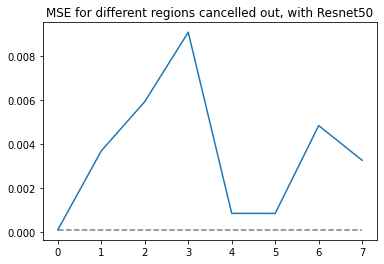

In [ ]:
import copy

mse_vec = []

for idx in range(len(dat['roi_names'])):
  X_test_cancelled = copy.deepcopy(X_test)
  X_test_cancelled[:, dat['roi']==idx] = 0

  y_hat_Test_cancelled = model.predict(X_test_cancelled)

  mse= np.mean((y_test-y_hat_Test_cancelled)**2)

  mse_vec.append(mse)
  print('Test set MSE with ROI', idx, 'called', dat['roi_names'][idx], '(with', len(dat['roi'][dat['roi'] == idx]), 'voxels) cancelled out: \t', mse)

plt.plot(mse_vec)
plt.hlines(mse_vec[0], xmin=0, xmax=7, linestyles='dashed', alpha=0.5)
t = plt.title('MSE for different regions cancelled out, with Resnet50')

# VGG16 features

In [ ]:
fname = "vgg16_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1epaylkWvcX0D-escbA9Yjj6WdJ3-SDcZ' -O vgg16_features.npy --quiet
fname = "vgg16_test_features.npy"
if not os.path.exists(fname):
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WrY7hmGtVQRPcefUwCJUf1NyosG-EfMy' -O vgg16_test_features.npy --quiet

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train = dat['responses']
X_test = dat['responses_test']
y_train = np.load('/content/vgg16_features.npy') 
y_test = np.load('/content/vgg16_test_features.npy') 

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
print('Test set statistics:')
print('\t Mean:\t', np.mean(y_test))
print('\t Std:\t', np.std(y_test))
print('\t Range:\t', np.max(y_test)-np.min(y_test))

## Training and test sets with $L_2$ regularization

In [ ]:
model = skl.Ridge(alpha=1)

model.fit(X_train, y_train)

y_hat_Train = model.predict(X_train)

mse_Train = np.mean((y_train-y_hat_Train)**2)
print('Training set MSE: ', mse_Train)

In [ ]:
y_hat_Test = model.predict(X_test)

mse_Test= np.mean((y_test-y_hat_Test)**2)
print('Test set MSE: ', mse_Test)

In [ ]:
import copy

mse_vec = []

for idx in range(len(dat['roi_names'])):
  X_test_cancelled = copy.deepcopy(X_test)
  X_test_cancelled[:, dat['roi']==idx] = 0

  y_hat_Test_cancelled = model.predict(X_test_cancelled)

  mse= np.mean((y_test-y_hat_Test_cancelled)**2)

  mse_vec.append(mse)
  print('Test set MSE with ROI', idx, 'called', dat['roi_names'][idx], '(with', len(dat['roi'][dat['roi'] == idx]), 'voxels) cancelled out: \t', mse)

plt.plot(mse_vec)
plt.hlines(mse_Test, xmin=0, xmax=7, linestyles='dashed', alpha=0.5)
t = plt.title('MSE for different regions cancelled out, with VGG16')

# Decode to DCT

## All dataset

In [ ]:
from scipy.fftpack import dct, idct

X = dat['responses']
print('X.shape: ', X.shape)

y = np.zeros((dat['stimuli'].shape[0], 128*128))

for i in range(dat['stimuli'].shape[0]):
  a = dat['stimuli'][i,:,:]
  y[i,:] = dct(dct(a).T).T.reshape(1,-1)
  
print('y.shape: ', y.shape)

In [ ]:
linreg_Ridge = skl.Ridge(alpha=1)

linreg_Ridge.fit(X, y) # predict DCT coefs from voxel responses

In [ ]:
y_hat = linreg_Ridge.predict(X)
print('y_hat.shape: ', y_hat.shape)

mse = np.mean((y - y_hat)**2)
print('MSE with features: ', mse)

In [ ]:
i = 100
sample_image = dat['stimuli'][i,:,:]
recons_image = idct(idct(y_hat[i,:].reshape(128,128).T).T)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(recons_image, cmap='gray')
plt.title('Reconstructed Image')

squared_error = np.abs((y - y_hat)**1)
print('Squared error: ', squared_error)

## Split into train and test sets

In [ ]:
X = dat['responses']
print('X.shape: ', X.shape)
y = dat['stimuli']
print('y.shape: ', y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
from scipy.fftpack import dct, idct

y_train_dct = np.zeros((y_train.shape[0], 128*128))

for i in range(y_train.shape[0]):
  a = y_train[i,:,:]
  y_train_dct[i,:] = dct(dct(a).T).T.reshape(1,-1)

y_test_dct = np.zeros((y_test.shape[0], 128*128))

for i in range(y_test.shape[0]):
  a = y_test[i,:,:]
  y_test_dct[i,:] = dct(dct(a).T).T.reshape(1,-1)
  
print('y_train_dct.shape: ', y_train_dct.shape)
print('y_test_dct.shape: ', y_test_dct.shape)

In [ ]:
linreg_Ridge = skl.Lasso(alpha=10, max_iter=5000)

linreg_Ridge.fit(X_train, y_train_dct) # predict DCT coefs from voxel responses

In [ ]:
y_hat_dct = linreg_Ridge.predict(X_test)
print('y_hat_dct.shape: ', y_hat_dct.shape)

mse = np.mean((y_test_dct - y_hat_dct)**2)
print('MSE with features: ', mse)

In [ ]:
i = 0
sample_image = y_test[i,:,:]
recons_image = idct(idct(y_hat_dct[i,:].reshape(128,128).T).T)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(recons_image, cmap='gray')
plt.title('Reconstructed Image')

squared_error = np.sum((sample_image - recons_image)**2)
print('Squared error: ', squared_error)